<a href="https://colab.research.google.com/github/M-Salim-I/Other-Projects/blob/main/Computation_Maths/Graph_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: "Networks"

For this project, you we will use the Python package [NetworkX](https://networkx.github.io/) extensively.

## Background information

In this project we use [graph theory](https://en.wikipedia.org/wiki/Graph_theory). 
A **graph** (or **network**) is simply a a collection of **nodes** (or **vertices**), which may or may not be joined by **edges**. 
(Note that this is not the same as the 'graph' of a function.)

Graphs can represent all sorts of real-world (and, indeed, mathematical) objects, e.g. 

* social networks (nodes represent people, edges represent 'friendship'),
* molecules in chemistry/physics (nodes represent atoms, edges represent bonds),
* communications networks, e.g. the internet (nodes represent computers/devices, edges represent connections).

In this project we will only consider **undirected** graphs (see the above Wikipedia link for a definition).

Conventiently, Python has a package, called [NetworkX](https://networkx.github.io/), for constructing and analysing graphs. 
Let's look at an example. 
Below we create the famous [Petersen graph](https://en.wikipedia.org/wiki/Petersen_graph) and use some basic NetworkX functions to learn a bit about it.

In [ ]:
# import NetworkX and other useful packages
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import networkx as nx

# create the Petersen graph, storing it in a variable called "PG"
PG = nx.petersen_graph()

Before we doing anything else, it would make sense to draw the graph, to get an idea of what it looks like. 
We can do this using the NetworkX function `draw_networkx` (together with our old favourtie, matplotlib).

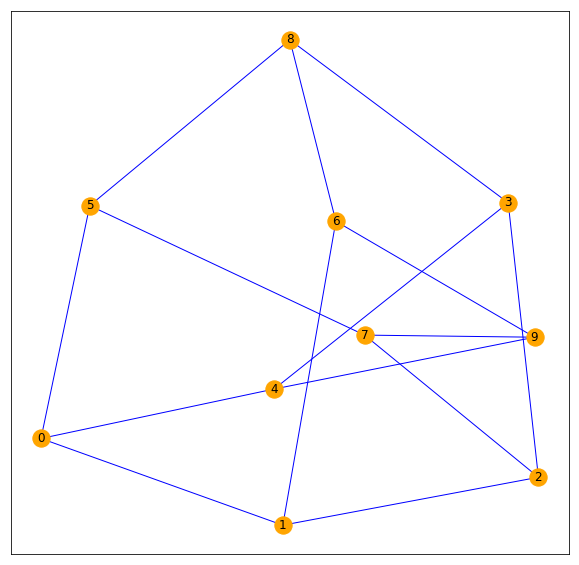

In [ ]:
nx.draw_networkx(PG, node_color = 'orange', edge_color = 'blue', with_labels=True)
plt.xticks([])
plt.yticks([])
plt.show()

We can see that the graph has 10 nodes, labelled by the integers $0,1,\ldots,9$. 
It is also possible to label nodes with other data types, most commonly strings, but we won't do that in this project. 
The nodes of a graph can be accessed via the method `nodes()`:

In [ ]:
PG.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

You can convert this to a Python list if you need to:

In [ ]:
list(PG.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

This (hopefully) makes it clear that the node labels do in fact have type `int`, at least in our example.
You can also see from the picture that the graph has 15 edges. 
These can be accessed using the method `edges()`:

In [ ]:
PG.edges()

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)])

Again, you can convert this to a list if you need to (try it), and you will see that the elements of the list are tuples. In either case, if you compare the output with the picture, it should become clear what it means, i.e. two nodes labelled $i$ and $j$ are joined by an edge if and only if the pair $(i, j)$ appears in `PG.edges()`. 

So far we haven't said much about how graphs are related to **mathematics**. It turns out that a graph can be completely defined by its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). This is simply a matrix $A$ defined as follows: 

* $A$ has size $n \times n$, where $n$ is the number of nodes in the graph;
* if the nodes labelled $i$ and $j$ form an edge, then the $(i,j)$-entry of $A$ is $1$; if they don't form an edge, the $(i,j)$-entry of $A$ is $0$.

This idea is the foundation of [algebraic graph theory](https://en.wikipedia.org/wiki/Algebraic_graph_theory), a field of mathematics used to study graphs by analysing certain matrices.

Not surprisingly, you can compute the adjacency matrix of a graph using an appropriate NetworkX function. Let's do this for the Petersen graph:

In [ ]:
A = nx.adjacency_matrix(PG)

Note that if you print this 'adjacency matrix', it doesn't actually look much like a matrix. This is because it doesn't have type `numpy.ndarray` like the matrices/arrays we've worked with in class:

In [ ]:
type(nx.adjacency_matrix(PG))

scipy.sparse.csr.csr_matrix

However, you can convert it to a `numpy.ndarray` by calling the method `toarray()`:

In [ ]:
A = A.toarray()

In [ ]:
type(A)

numpy.ndarray

After doing this, the adjacency matrix looks like you would expect, so you can use all the usual `numpy.linalg` functions on it:

In [ ]:
print(A)

[[0 1 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]]


Make sure that you understand what all these $0$'s and $1$'s mean: the $(i,j)$-entry of the adjacency matrix is $1$ if and only if the edges labelled $i$ and $j$ form an edge in the graph; otherwise, it is $0$. For example (remembering that Python starts counting from $0$, not from $1$): the $(0,4)$ entry is $1$, and in the picture above we see that nodes $0$ and $4$ form an edge; on the other hand, the $(1,7)$ entry is $0$, and accordingly nodes $1$ and $7$ don't form an edge.

We will be working with matrices related to graphs quite a lot in this project, so before you begin you should make sure that you understand what the code we've given you above is doing. 
You may also like to work through the official [NetworkX tutorial](https://networkx.github.io/documentation/stable/tutorial.html) before attempting the project, bearing in mind that not everything in the tutorial is relevant to the project. 
(Alternatively, Google for another tutorial if you don't like that one.)

**A final remark before we get to the project itself:**

You can rest assured that the graphs we consider this project all have the following nice properties:

* They are **connected**. This means that for every pair of nodes $i$ and $j$, there is a 'path' of edges joining $i$ to $j$. For example, the Petersen graph is connected, e.g. the nodes labelled $6$ and $7$ do not form an edge, but we can still reach node $7$ from node $6$ via the edges $(6,9)$ and $(9,7)$.
* They are **simple**. This means that there is never an edge from a node to itself.

## The project

### Part I: Data import and preliminary investigation

We will use a Python file called **"data.py"**, which should be saved in the same directory as this Jupyter notebook.
This file contains a function `create_graph` which constructs a random graph that you will be analysing throughout the project. 
By following the instructions in question 1 (below), you will create a graph that is unique to you, i.e. no two students will have the same graph.

**1.** Executing the following code cell to create your graph, storing it in a variable called `G`

In [ ]:
from data import create_graph

# Replace "123456789" below with your 9-digit student number

G=create_graph(170050601)

# Replace "123456789" above with your 9-digit student number

**2. ** Draw the graph, and calculate how many nodes and edges it has. 

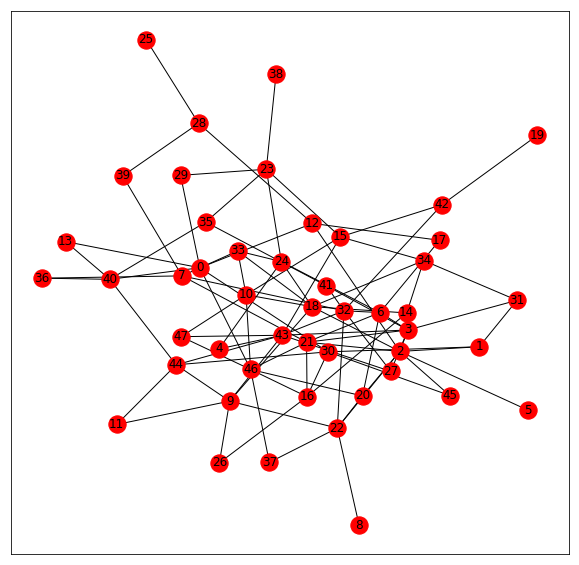

Answer: There are 48 nodes
Answer: There are 94 edges


In [ ]:
# Drawing the graph
nx.draw_networkx(G, node_color='red', edge_color='black', with_labels=True)

plt.xticks([])
plt.yticks([])
plt.show()
# Number of nodes
num_of_nodes=len(list(G.nodes()))
print("Answer: There are " + str(num_of_nodes) + " nodes")
# Number Of edges
num_of_edges=len(list(G.edges()))
print("Answer: There are " + str(num_of_edges) + " edges")

**3.** Writing a function `distance_matrix` which computes the distance matrix of a graph. 
The function should return a matrix, represented as an array of type `numpy.ndarray`, of the same shape as the adjacency matrix of the graph. 
We may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but we will ** not use any other NetworkX functions**.

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.dijkstra.html

In [ ]:
import scipy as py
def distance_matrix(G):
    # Convert the graph into an adjacency matrix
    adj_mat_G=nx.adjacency_matrix(G)
    # Convert the adjacency matrix to an array
    adj_mat_G=adj_mat_G.toarray()
    # Dijkstra's algorithm finds the shortest path between two nodes, undirected & unweighted graph so each edge has weight of 1 by default
    return py.sparse.csgraph.dijkstra(adj_mat_G, directed=False , indices=None, return_predecessors=False, unweighted=False)
print(distance_matrix(G))
print(type(distance_matrix(G)))

[[0. 2. 2. ... 2. 1. 2.]
 [2. 0. 1. ... 2. 3. 4.]
 [2. 1. 0. ... 1. 2. 3.]
 ...
 [2. 2. 1. ... 0. 3. 4.]
 [1. 3. 2. ... 3. 0. 1.]
 [2. 4. 3. ... 4. 1. 0.]]
<class 'numpy.ndarray'>


In [ ]:
# Checking if my function is correct using another algorithm that computes the distance matrix as well
print(nx.floyd_warshall_numpy(G))
print(distance_matrix(G)==nx.floyd_warshall_numpy(G))

[[0. 2. 2. ... 2. 1. 2.]
 [2. 0. 1. ... 2. 3. 4.]
 [2. 1. 0. ... 1. 2. 3.]
 ...
 [2. 2. 1. ... 0. 3. 4.]
 [1. 3. 2. ... 3. 0. 1.]
 [2. 4. 3. ... 4. 1. 0.]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


**4** Using the function from above, find a pair of nodes $(i,j)$ in your graph from Part I with the property that the distance from $i$ to $j$ is maximal amongst all pairs of nodes in the graph. 

Note: This means that for every *other* pair of nodes $(i',j')$, the distance from $i'$ to $j'$ is less than or equal to the distance from $i$ to $j$.

In [ ]:
# https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.unravel_index.html
# https://www.geeksforgeeks.org/numpy-argmax-python/
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html
# https://stackoverflow.com/questions/3584243/get-the-position-of-the-biggest-item-in-a-numpy-array

In [ ]:
# Distance matrix
a_array=distance_matrix(G)
print(a_array)
# Converting the array to a list
a_list=a_array.tolist()
# Finding the maximium for each row (in this case the maximum for each sublist)
maximal_sub_list=max(a_list)
print(maximal_sub_list)
# Finds the maximum number from all the maximums of each row 
maximal_list=max(maximal_sub_list)
print(maximal_list)
# Need to find the start and end nodes
from numpy import unravel_index
# The path that has a length of 6 is the node from 4 to 25
psn=unravel_index(a_array.argmax(),a_array.shape)
print(psn)
print("Answer: " + str(psn))

[[0. 2. 2. ... 2. 1. 2.]
 [2. 0. 1. ... 2. 3. 4.]
 [2. 1. 0. ... 1. 2. 3.]
 ...
 [2. 2. 1. ... 0. 3. 4.]
 [1. 3. 2. ... 3. 0. 1.]
 [2. 4. 3. ... 4. 1. 0.]]
[5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 5.0, 6.0, 4.0, 2.0, 5.0, 4.0, 4.0, 0.0, 4.0, 4.0, 3.0, 3.0, 4.0, 6.0, 5.0, 3.0, 5.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 3.0, 1.0, 3.0, 4.0, 5.0, 4.0, 4.0]
6.0
(4, 25)
Answer: (4, 25)


In [ ]:
# Checking if (4,25) in the distance matrix has a length of 6
print(a_array[4,25])

6.0


**5.** Find a shortest path between your nodes from above, i.e. one with the shortest possible length, and re-draw your graph so that this path is clearly visible. 
You should use one colour for the nodes and edges in the path, and a different colour for all other nodes and edges. 

In [ ]:
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib 
# (Also for Q10 & Q14)
# https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
# https://stackoverflow.com/questions/27030473/how-to-set-colors-for-nodes-in-networkx-python
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
# (Also for Q10 & Q14)

[4, 43, 32, 7, 39, 28, 25]
6


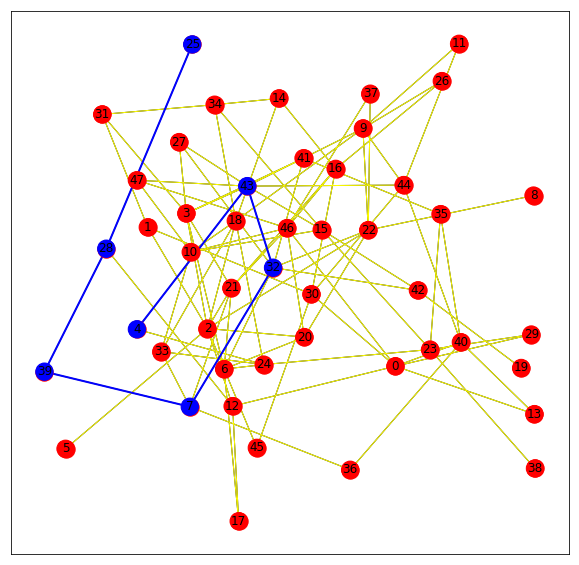

In [ ]:
# Increase the image size so the shortest path is clear
from pylab import rcParams
rcParams['figure.figsize']=(10, 10)
# Start node is 4 and the end node is 25
s_p=nx.shortest_path(G, source=4, target=25)
# Nodes that are in the shortest path
print(s_p)
p_l=nx.dijkstra_path_length(G, 4, 25)
# Length of the path
print(p_l)
# k: moves nodes further apart
visible=nx.spring_layout(G, k=1, iterations=100, scale=10)
# Assigning colours to the nodes that are in the shortest path and those that are not
nodes_in_s_p=[]
for n in G.nodes():
    if n in s_p:
        nodes_in_s_p.append('blue')
    else:
        nodes_in_s_p.append('red') 
# Drawing the original graph
nx.draw_networkx(G, visible, with_labels=True)
# Colouring the nodes
nx.draw_networkx_nodes(G, visible, node_color=nodes_in_s_p)
# Colouring the edges in the shortest path and not in the shortest path
nx.draw_networkx_edges(G, visible, edge_color="yellow")
nx.draw_networkx_edges(G, visible, edgelist=[(4,43), (43,32), (32,7), (7,39), (39,28), (28,25)], width=2, edge_color="blue")

plt.xticks([])
plt.yticks([])
plt.show()

**6.** Writing a function `number_of_spanning_trees` which takes as input a graph $G$ and returns the number of spanning trees in $G$. You may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but you **may not use any other NetworkX functions**.

In [ ]:
def number_of_spanning_trees(G):
    # Convert the graph into an adjacency matrix
    adj_mat_G=nx.adjacency_matrix(G)
    # Convert the adjacency matrix to an array
    adj_mat_G=adj_mat_G.toarray()
    # Calculating degree matrix
    # Identity matrix of size 48x48 (which is the number of nodes in my graph)
    I_G=np.eye(G.order())
    # Calculating the degree for each node 
    row_sum=np.sum(adj_mat_G, axis=0)
    # Transposing the row vector into a column vector
    r_s_T=row_sum.T
    # Multiply elementwise so the dimension of the matrix doesn't change
    deg_mat_G=I_G*r_s_T
    # Laplacian matrix L=D-A
    lap_mat_G=deg_mat_G-adj_mat_G
    # Calculating the co-factor of the laplacian matrix (can pick any row and column)
    del_1_row_G=np.delete(lap_mat_G, (0), axis=0)
    del_2_col_G=np.delete(del_1_row_G, (0), axis=1)
    no_of_spanning_trees_G=la.det(del_2_col_G)
    return no_of_spanning_trees_G

**7** Use the function above to calculate the number of spanning trees in your graph from Part I.

In [ ]:
print(number_of_spanning_trees(G))
print("Answer: " + str(number_of_spanning_trees(G)))

1.9866901055363852e+20
Answer: 1.9866901055363852e+20


In [ ]:
# Checking if function is correct for the graph PG
print(number_of_spanning_trees(PG))

1999.9999999999998


**8** Find a minimal spanning tree ofthe graph i.e. one with the smallest possible number of edges. Re-draw the graph in such a way that this spanning tree is clearly visible. We will use one colour for the edges in the spanning tree, and a different colour for all other edges. 

In [ ]:
# https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html

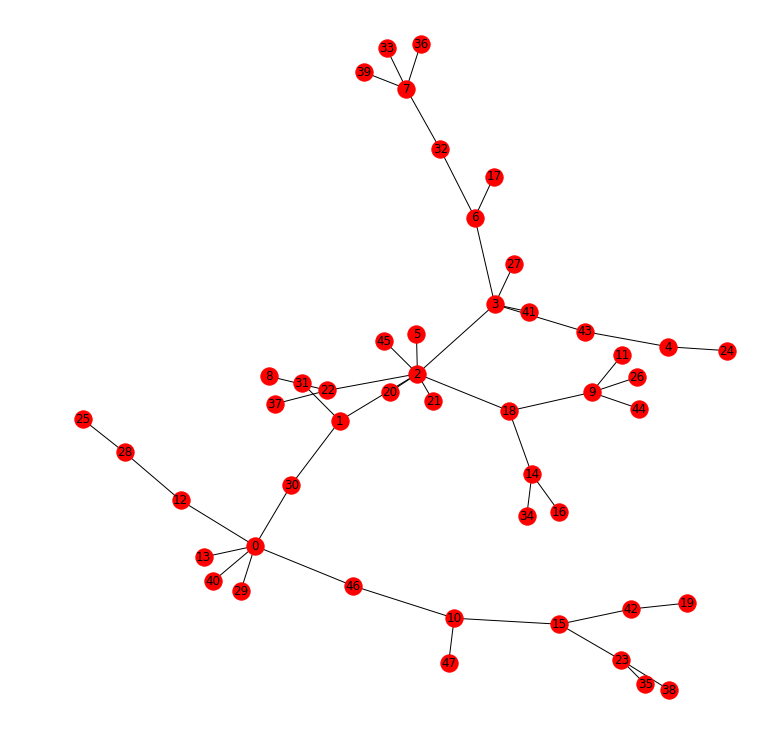

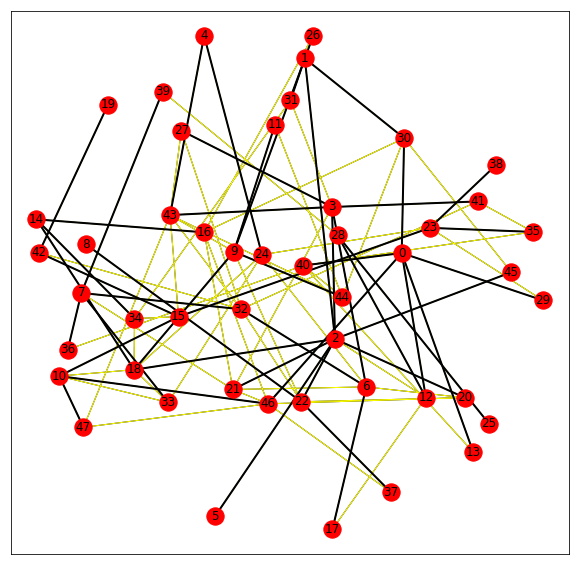

In [ ]:
# Increase the image size so the spanning tree is more clear
from pylab import rcParams
rcParams['figure.figsize']=(10, 10)
# Drawing the minimum spanning tree only
mst=nx.minimum_spanning_tree(G)
nx.draw(mst, with_labels=1, edge_color='black')
plt.show() 
# Drawing the minimum spannning tree and the original graph
mst_edges=sorted(mst.edges())
# k: moves nodes further apart
visible=nx.spring_layout(G, k=1, iterations=50, scale=10)
# Drawing the graph
nx.draw_networkx(G, visible, with_labels=True, node_color='red')
# One colour for edges in the spanning tree and different colour for all other edges
nx.draw_networkx_edges(G, visible, edge_color='yellow')
nx.draw_networkx_edges(G, visible, edgelist=mst_edges, width=2, edge_color='black')

plt.xticks([])
plt.yticks([])
plt.show()

**9** Calculating the number of triangles in the graph

In [ ]:
"""
Trace of a matrix:
sum of the elements on the main diagonal of a square matrix
Trace of a matrix is the sum of the eigenvalues of the matrix
"""
adj_mat_G=nx.adjacency_matrix(G)
adj_mat_G=adj_mat_G.toarray()
adj_mat_G_3=la.matrix_power(adj_mat_G,3)
list_of_eigvals=la.eigvals(adj_mat_G_3)
print(int(round(sum(list_of_eigvals)/6)))
# Using the trace of a matirx instead
trace_adj_mat_G_3=np.trace(adj_mat_G_3)
num_of_triangles_G=int(round(trace_adj_mat_G_3/6))
print(num_of_triangles_G)
# Relation between the trace of a matrix and the eigenvalues
print(trace_adj_mat_G_3==int(round(sum(list_of_eigvals))))
print("Answer: " + str(num_of_triangles_G))

13
13
True
Answer: 13


**10.** Writing a function `all_triangles` which finds all of the triangles in a graph. Using this function to count the number of triangles in your graph.

In [ ]:
# https://stackoverflow.com/questions/1705824/finding-cycle-of-3-nodes-or-triangles-in-a-graph

In [ ]:
def all_triangles(G):
    # Gives the cliques of the graph (k=1,2,3...max degree-1)
    all_cliques=nx.enumerate_all_cliques(G)
    # Getting just triangles i.e k=3
    tri_cliques=[x for x in all_cliques if len(x)==3]
    return tri_cliques

print(all_triangles(G))
print(len(all_triangles(G)))
print(len(all_triangles(G))==num_of_triangles_G)
print("Answer: " + "The number of triangles in the graph is "+ str(len(all_triangles(G))))

[[0, 13, 40], [2, 3, 21], [2, 20, 22], [3, 6, 21], [3, 27, 43], [9, 11, 44], [9, 43, 44], [10, 18, 33], [10, 46, 47], [14, 18, 34], [16, 21, 46], [18, 24, 33], [27, 32, 43]]
13
True
Answer: The number of triangles in the graph is 13


In [ ]:
# Checking if the function is correct for the graph PG
print(all_triangles(PG))
print(len(all_triangles(PG)))

[]
0


**11.** Re-draw the graph, so that all of its triangles are clearly visible. 
We use one colour for the edges that appear in at least one triangle, and a different colour for all other edges.

In [ ]:
# https://www.geeksforgeeks.org/permutation-and-combination-in-python/
# https://stackoverflow.com/questions/11264684/flatten-list-of-lists

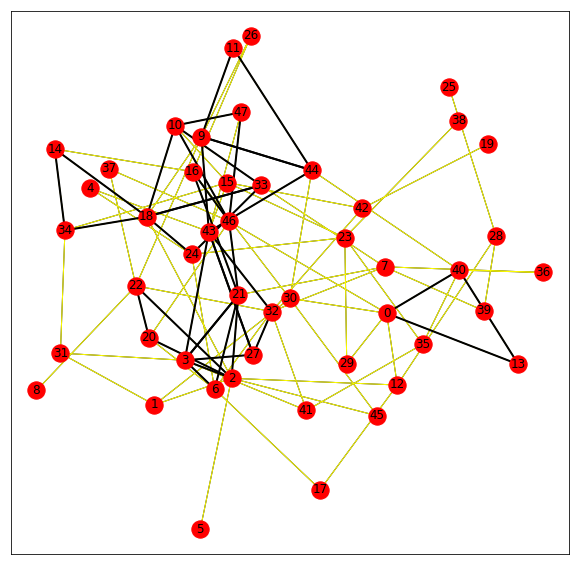

In [ ]:
# Increase the image size so triangles are more clear
from pylab import rcParams
rcParams['figure.figsize']=(10, 10)
# Getting the edgelist of the triangles
from itertools import combinations 
t_e=all_triangles(G)
# Tuple each triangle list
t_e=[tuple(l) for l in t_e]

# Make a combination for each tuple so that it creates a cycle
a=[]
for i in range(len(t_e)):
    x=list(combinations(t_e[i],2))
    a.append(x)

# Edgelist can only take 1 list with element of tuples of size two
tri_cycles=[cycle for sublist in a for cycle in sublist]
# k: moves nodes further apart
visible=nx.spring_layout(G, k=1, iterations=100, scale=10)
# Drawing the graph
nx.draw_networkx(G, visible, with_labels=True, node_color='red')
# One colour for edges that form a triangle and different colour for all other edges
nx.draw_networkx_edges(G, visible, edge_color='yellow')
nx.draw_networkx_edges(G, visible, edgelist=tri_cycles, width=2, edge_color='black')

plt.xticks([])
plt.yticks([])
plt.show()